#Data Pipeline for PriceMyRental

Import pandas, and the get_data function from get_data.py that will retrieve and parse the data

In [2]:
import pandas as pd
import numpy as np
from get_data import get_data
from clean_data import clean_data
from models import clean, tokenize, get_tfidf, run_nmf, median_neighbors
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from geopy.distance import vincenty
%matplotlib inline

Set the start and end dates that we want to pull data between, and call get_data, saving the result to a pandas dataframe. We set one_city==True so that we'll only retrieve data for San Francisco. This should take roughly 30 minutes. Set print_urls==True if you want to see the url of each JSON as it's being parsed. 

In [81]:
#These are commented out so they're not run inadvertently 
# start_date = date(2014, 9, 29)
# end_date = date(2015, 6, 17)
# get_data(start_date, end_date, one_city=True, print_urls=False)


In [4]:
sfdf = clean_data()

In [6]:
sfdf.reset_index(inplace=True)


In [235]:
random_forest_regressor(test_df)

('Test R^2 is ',
 0.7217934214554782,
 'RMSE is ',
 973.44139789529413,
 'Feature Importances are ',
 [('beds', 0.15610075785384989),
  ('baths', 0.56024741156561553),
  ('parking', 0.036730526841544389),
  ('washer_dryer', 0.027153564391241464),
  ('price_1bd_med', 0.21976773934774876)])

In [246]:
clean_text = clean(sfdf.body.values)

In [250]:
vectorizer, X = get_tfidf(clean_text)

In [257]:
latent_weights = run_nmf(X, vectorizer, n_topics=4)

Topic #0:
room floor bedroom unit park new build month larg one
()
Topic #1:
nbsp amp jwavro wavro j craigslist www com http zoomtopost
()
Topic #2:
bull amp inform unit room bedroom secur hous floor street
()
Topic #3:
apart francisco san pm center home communiti featur soma today
()


In [258]:
latent_weights.shape

(75527, 4)

In [262]:
latent_df = pd.DataFrame(latent_weights, columns=('Latent Factor 1', 'Latent Factor 2', 'Latent Factor 3', 'Latent Factor 4'))

In [273]:
test_df = test_df.reset_index()
del test_df['neighborhood']
merged_df = pd.concat([test_df, latent_df], axis=1)

In [274]:
merged_df

,beds,baths,parking,washer_dryer,price_1bd_med,price,Latent Factor 1,Latent Factor 2,Latent Factor 3,Latent Factor 4
0,2,2,0,1,3505.0,12500,0.016224,0.000629,0.001625,0.021221
1,1,1,4,1,3505.0,3500,0.042188,0.003926,0.001742,0.017846
2,0,1,1,0,3505.0,1625,0.028427,0.006096,-0.000000,0.001187
3,2,2,0,1,3505.0,6950,0.025953,0.029131,0.025668,0.022646
4,2,2,0,0,3505.0,5700,0.016179,0.000698,0.001598,0.026938
5,1,1,4,1,3505.0,3750,0.028203,0.057661,0.001917,0.016166
6,1,1,4,1,3505.0,3450,0.027143,0.066576,0.001596,0.006115
7,1,1,4,1,3505.0,3950,0.030767,0.021705,0.000498,0.026234
8,2,2,4,1,3505.0,3895,0.029072,0.054692,0.001605,0.025508
9,2,2,4,1,3505.0,4500,0.039447,0.029965,0.000306,0.009524


In [275]:
random_forest_regressor(merged_df)

('R^2 is ',
 0.80713926167495353,
 'RMSE is ',
 805.00381493260682,
 'Feature Importances are ',
 [('beds', 0.11906440770533769),
  ('baths', 0.43253028023391771),
  ('parking', 0.018568937337034838),
  ('washer_dryer', 0.019116696961743441),
  ('price_1bd_med', 0.15903953519695549),
  ('Latent Factor 1', 0.080510094662697734),
  ('Latent Factor 2', 0.040486314761146058),
  ('Latent Factor 3', 0.058110931973800704),
  ('Latent Factor 4', 0.072572801167366363)])

In [279]:
sfdf = sfdf.reset_index()

In [348]:
month_starts = [x[:7] for x in sfdf['date']]

['2014-09', '2014-09', '2014-09', '2014-09', '2014-09']

In [349]:
sfdf.pop('month')
sfdf['year-month'] = month_starts

In [351]:
df_copy = sfdf.copy()
df_grouped_median = df_copy[(df_copy['beds']==1)].groupby('year-month').median()

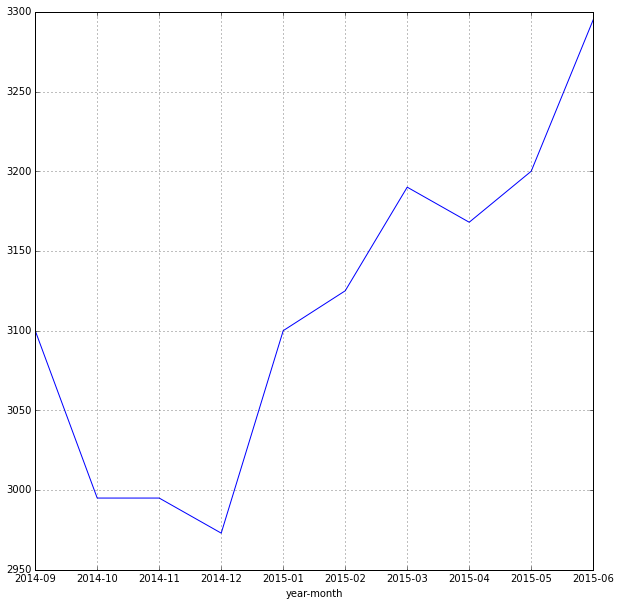

In [365]:
plt.figure(figsize=(10,10))
df_grouped_median['price'].plot()

In [368]:
from geopy.distance import vincenty

In [409]:
vincenty((sfdf.lat[0], sfdf.long[0]), (sfdf.lat[1], sfdf.long[1])).meters

714.8399798017355

In [375]:
dfcopy = sfdf.copy()

In [380]:
dfcopy.ix[0]

neighborhood                                    SOMA / south beach
baths                                                            2
beds                                                             2
body             \n Millennium Towers is the Pinnacle of Luxury...
date                                           2014-09-29 05:51:39
heading          MILLENNIUM Grand Residence w beautiful views o...
id                                                    1.418065e+09
lat                                                       37.78067
long                                                     -122.3881
parking                                                          0
price                                                        12500
region                                                         sfc
washer_dryer                                                     1
price_1bd_med                                                 3505
year-month                                                 201

In [424]:
from geopy.geocoders import Nominatim

In [425]:
geolocator = Nominatim()


In [433]:
location = geolocator.geocode('770 Pine St, San Francisco, 94108')

In [435]:
location.latitude, location.longitude

(37.7912091851852, -122.40868862963)

In [8]:
sql_df = sfdf[['id', 'beds', 'baths', 'lat', 'long', 'price']]

In [10]:
sql_df.to_csv('data/sql_df.csv', index=False, encoding='utf-8')